In [25]:
import torch
import mlflow
import joblib
import numpy as np
import yaml

In [29]:
model_path = "C:/Users/thuan/Desktop/CVCI/Final_project/final_cvci/src/models/model.pth"
model = torch.load(model_path)

In [39]:
from PIL import Image

img_path = "C:/Users/thuan/Desktop/CVCI/Final_project/final_cvci/data/external/classification-of-plants-of-southeast-asia/bali-26_train/bali-26_train/bamboo/25.jpg"
image = Image.open(img_path)

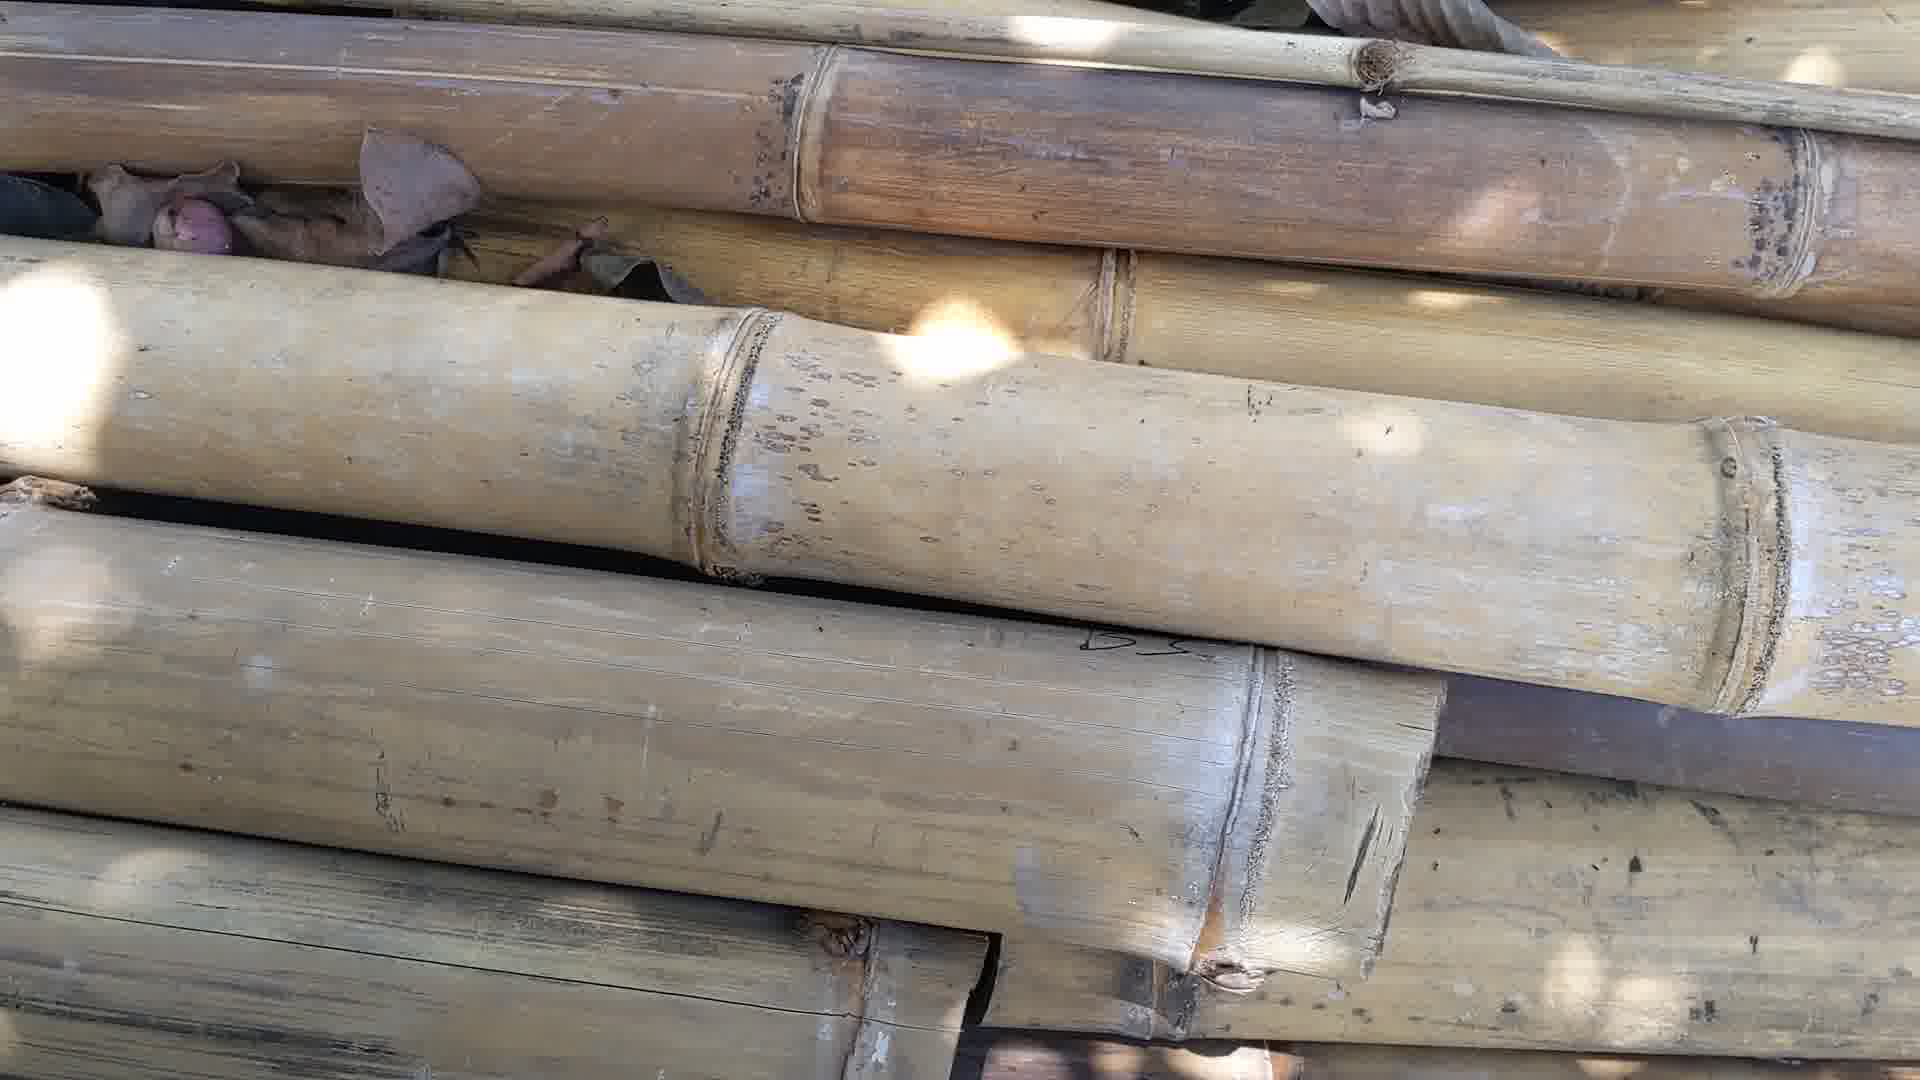

In [40]:
image

In [31]:
import torchvision
from torchvision import transforms

def predict(model, image):

  IMG_MEAN = [0.485, 0.456, 0.406]
  IMG_SDEV = [0.229, 0.224, 0.225]

  data_transforms =  transforms.Compose([
              transforms.Resize(256),
              transforms.CenterCrop(224),
              transforms.ToTensor(),
              transforms.Normalize(IMG_MEAN, IMG_SDEV)])
    
  image = data_transforms(image)
  img_tensor = torch.from_numpy(np.expand_dims(image, axis=0)).type(torch.FloatTensor)
  img_tensor = img_tensor.to(device)

  model.eval()
  with torch.no_grad():
      output = torch.exp(model(img_tensor))
      _, output_class = torch.max(output, 1)

  return output_class

In [32]:
device = 'cuda'

In [34]:
import json

with open("C:/Users/thuan/Desktop/CVCI/Final_project/final_cvci/src/models/class_to_idx.json") as f:
    class_to_idx = json.load(f)

In [42]:
pos = list(class_to_idx.values()).index(predict(model, image))

In [46]:
rs = list(class_to_idx.keys())[pos]

rs

'bamboo'